## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part 1 - Probability](#probability)
- [Part 2 - A/B Test](#ab_test)
- [Part 3 - Regression](#regression)
- [Part 4 - Another Look at the Time Factor](#time)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part 1 - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset. 

The number of rows would be the first number in the shape; in this case 294,478.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset. 

The number of unique user ids is 290,584

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted. 

The proportion of users converted overall is about 12.10%

In [5]:
df[df['converted']==1]['user_id'].nunique()/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

The number of timez the control group lined up with the new page and the number of times the treatments lined up with the old_page are shown in the table. Interestingly, the number where it lined up correctly is 1 more than the number of unique users. This will require looking into.

In [6]:
df.groupby(['group','landing_page'])['user_id'].count()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: user_id, dtype: int64

f. Do any of the rows have missing values?

It appears there are no missing values (thank you for that cleaning).

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df_treat_new  = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
df_ctrl_old = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]
df2 = df_treat_new.append(df_ctrl_old)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
dup_user = df2[df2['user_id'].duplicated() == True]['user_id'].item()
dup_user

773192

c. What is the row information for the repeat **user_id**? 

In [12]:
dup_user_df = df2[df2['user_id'] == dup_user]
dup_user_df

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop([dup_user_df.index[0]], inplace = True)
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
total_users = df2['user_id'].count()
total_conv = df2[df2['converted'] == 1]['user_id'].count()
total_prob_conv = total_conv/total_users
total_prob_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
ctrl_users = df2[df2['group'] == 'control']['user_id'].count()
ctrl_conv = df2[(df2['converted'] == 1) & (df2['group'] == 'control')]['user_id'].count()
ctrl_prob_conv = ctrl_conv/ctrl_users
ctrl_prob_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treat_users = df2[df2['group'] == 'treatment']['user_id'].count()
treat_conv = df2[(df2['converted'] == 1) & (df2['group'] == 'treatment')]['user_id'].count()
treat_prob_conv = treat_conv/treat_users
treat_prob_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
treat_prob = treat_users/total_users
treat_prob

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

At present it looks like the treatment is actually lowering the probability of conversions. With straight probabilities, the old landing page looks better. I want to look at the time/date stamp to see how long the test was run, as it might need to be run longer.

In [18]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['timestamp'].max() - df2['timestamp'].min()

Timedelta('21 days 23:59:49.081927')

This test was run for 3 weeks. I'm not sure if this is enough time for users to get used to the new landing page. Running the test longer would see if there's any change to the conversion rate. If the conversion rate doesn't increase over time, the new page isn't working.

<a id='ab_test'></a>
### Part 2 - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

As the only reason for a company to put out a new webpage would be to improve business. While it appears from the probability rates that the new page is not working, the AB test should have these hypotheses:

$H_0$: $p_{new}$ - $p_{old}$ <= 0 

$H_1$: $p_{new}$ - $p_{old}$ > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new = total_prob_conv
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = total_prob_conv
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
n_new = treat_users
n_new

145310

d. What is $n_{old}$?

In [22]:
n_old = ctrl_users
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0, 1], p = [1 - p_new, p_new], size = n_new)
new_page_converted.mean()

0.12002615098754388

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0, 1], p = [1 - p_old, p_old], size = n_old)
old_page_converted.mean()

0.11958092982915043

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

0.0004452211583934468

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0, 1], p = [1 - p_new, p_new], size = n_new)
    old_page_converted = np.random.choice([0, 1], p = [1 - p_old, p_old], size = n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

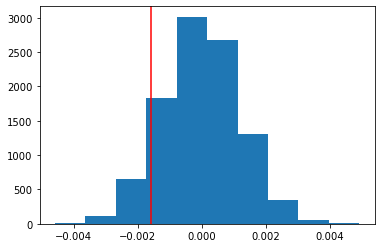

In [27]:
obs_diff = treat_prob_conv - ctrl_prob_conv

plt.hist(p_diffs)
plt.axvline(x = obs_diff, color = 'r')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
(p_diffs > obs_diff).mean()

0.9048

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Assuming that the probabilities of converting with the new and old landing pages are the same, a random sample of each was created. The difference between the means of the two samples should be normally distributed around 0. The actual observed difference is less than 90.32% of these samples. This shows evidence not to reject the null so it cannot be concluded that the new page is better than the old page in terms of conversion rate. Note: there are 9.68% of the samples less than the observed mean and so we also cannot conclude that the old page is better.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = ctrl_conv
convert_new = treat_conv
n_old = ctrl_users
n_new = treat_users

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
sm.stats.proportions_ztest(convert_new, n_new, value = convert_old/n_old, alternative = 'larger')

(-1.859354929150913, 0.9685115770700896)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The $z$-score indicates that this is 1.859 standard deviations below the mean (first value). The $p$-value is 0.9685 which means 96.85% of the expected values are above the observed value, or 3.15% of expected values are below.

The $p$-value of 0.9685 form the stats model package is higher than the $p$-value computed running the simulation. Both show that the value is less than the mean, but if the null hypothesis was the new was greater than or equal to the old page the test with stats models would show statistical significance (alpha at 0.05) whereas the simulation does not.

<a id='regression'></a>
### Part 3 - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

As we're trying to figure out a binary value (converted or not converted), a logistic regression would be more appropriate. This will give us the probability that it matches one of the two values. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2[['control','treatment']] = pd.get_dummies(df2['group'])
df2['intercept']=1
df2.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept', 'treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:06:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part 2**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part 2**?

The $p$-values found in Part 2 are a one-tailed test and our result is on the tail that is not being tested; we're seeing the probability that the difference of the new to the old is greater than 0, where the observed difference is less than 0.

The $p$-value found with the logistic regression would be that the means are not equal, so a two-tailed test instead of one. The $p$-value of 0.190 means it a decent way from a mean of 0, but we don't know which direction and it's not statically significant anyway.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In this situation, it would definitely be a good idea to put in more variables. With just a binary categorical variable, our logistic model has two outputs; p(old_page) and p(new_page), both of these we know and are rather close to each other. More variables would provide a lot more information.

In general, more factors can lead to better regression models, but some considerations must be taken into account. First, we must try to avoid collinearity in our factors; these factors are likely dependent on each other will make interpreting the results difficult. Second, take into account the range of our factors; having a very large range in one factor and a small range in another can through off the variables, normalizing these factors can be used to fix this. Third, outliers can have a very big effect on these models and need to be taken into consideration.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = df2.set_index('user_id').join(countries_df.set_index('user_id'), how='inner')
df_new.head()

,timestamp,group,landing_page,converted,control,treatment,intercept,country
user_id,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1,CA
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,1,UK
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1,CA


In [35]:
df_new['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [36]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.head()

,timestamp,group,landing_page,converted,control,treatment,intercept,country,CA,UK,US
user_id,,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1,CA,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,1,UK,0,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1,CA,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
### Fit Your Logistic Model And Obtain the Results
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:               2.323e-05
Time:                        17:06:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

<a id='time'></a>
### Part 4 - Another Look at the Time Factor

This test was run for about 3 weeks. Is there any difference as the test continues from week to week? I'm going to take a look at that here. This is going to be a quick look to see if this is a direction to go in so I'm aware that I'm splitting the week in the middle of the day (around 1:40 pm).

First, I'm going to look at the difference in the mean between the new and old pages to see if there's any change between the 1st, 2nd, and 3rd weeks. If there's no notable change between the weeks, I will stop there. Otherwise I will look into it further.

In [38]:
# to make it a little easier I'm spliting up the weeks into their own dataframes
start = df2['timestamp'].min()
df_week1 = df2[df2['timestamp'] < start + np.timedelta64(7,'D')]
df_week2 = df2[(df2['timestamp'] >= start + np.timedelta64(7,'D')) & (df2['timestamp'] < start + np.timedelta64(14,'D'))]
df_week3 = df2[(df2['timestamp'] >= start + np.timedelta64(14,'D')) & (df2['timestamp'] < start + np.timedelta64(21,'D'))]


In [39]:
def get_stats(DF):
    total_users = DF['user_id'].count()
    total_conv = DF[DF['converted'] == 1]['user_id'].count()
    total_prob_conv = total_conv/total_users
    
    ctrl_users = DF[DF['group'] == 'control']['user_id'].count()
    ctrl_conv = DF[(DF['converted'] == 1) & (DF['group'] == 'control')]['user_id'].count()
    ctrl_prob_conv = ctrl_conv/ctrl_users
    
    treat_users = DF[DF['group'] == 'treatment']['user_id'].count()
    treat_conv = DF[(DF['converted'] == 1) & (DF['group'] == 'treatment')]['user_id'].count()
    treat_prob_conv = treat_conv/treat_users
    
    return total_prob_conv, ctrl_prob_conv, treat_prob_conv

total_prob = []
ctrl_prob = []
treat_prob = []
for i in [df_week1, df_week2, df_week3]:
    tot, ctl, trt = get_stats(i)
    total_prob.append(tot)
    ctrl_prob.append(ctl)
    treat_prob.append(trt)



In [40]:
week_stats_df = pd.DataFrame(data = {'week':[1,2,3], 'overall_rate': total_prob, 'control_rate': ctrl_prob, 'treatment_rate':treat_prob})
week_stats_df.head()

,week,overall_rate,control_rate,treatment_rate
0,1,0.118503,0.119364,0.117647
1,2,0.118696,0.119530,0.117860
2,3,0.121414,0.122105,0.120722


The conversion rates are increasing in all categories. The new page is increasing at a rate slightly greater than the old page, but it's barely noticeable (between week 1 and week 2, the new page is increasing at a rate of 0.000047 conversion rates per week than the old page and between week 2 and week 3 this is 0.000287). 

Depending on the cost of creating the new page and the cost of running the test. I would suggest running the AB test for a few more weeks to see if more time will make a difference.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.